In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder

In [23]:
data=pd.read_csv("employee.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.groupby(["department"]).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
department,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [6]:
data.groupby(["salary"]).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,left
salary,,,,,,,,,
high,1237,1237,1237,1237,1237,1237,1237,1237,1237
low,7316,7316,7316,7316,7316,7316,7316,7316,7316
medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


In [7]:
data.groupby(["left"]).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [8]:
data_plot=data[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","left"]]
#continuos verileri görselleştirmek için seçiyorum

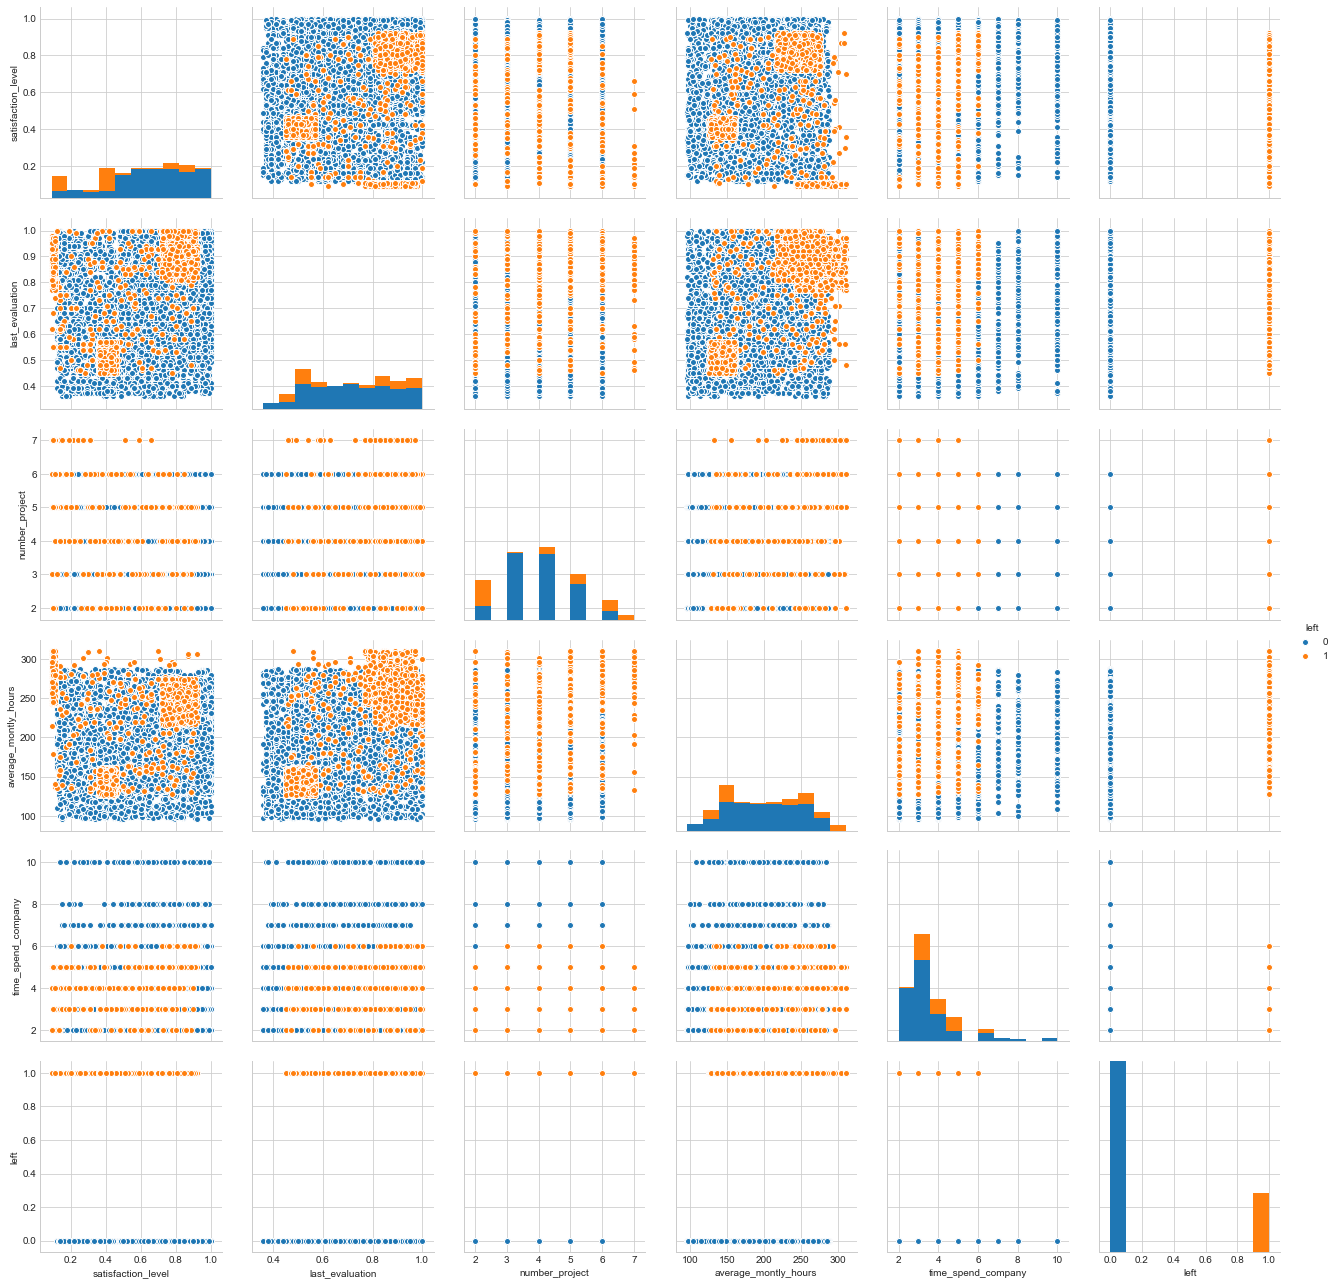

In [9]:
sns.set_style("whitegrid");
sns.pairplot(data_plot, hue="left", size=3);
plt.show()

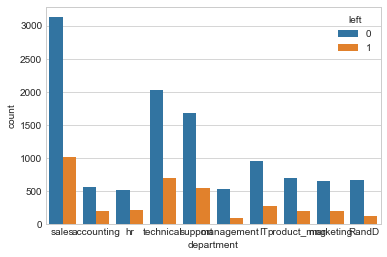

In [10]:
#categorik veriler için
sns.countplot(x='department', hue='left', data=data)

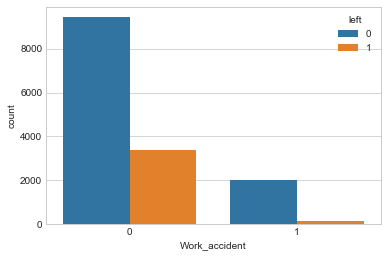

In [11]:
sns.countplot(x='Work_accident', hue='left', data=data)

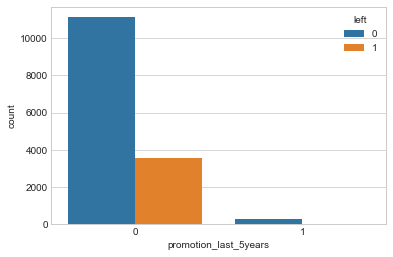

In [12]:
sns.countplot(x='promotion_last_5years', hue='left', data=data)

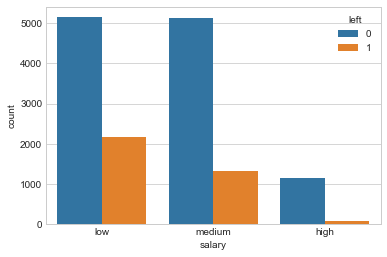

In [13]:
sns.countplot(x='salary', hue='left', data=data)

In [24]:
salary_mapping = {'high':3,'medium':2, 'low' : 1}
data['salary'] = data['salary'].map(salary_mapping)
#ordinal veri oldukları için mapping işlemi

In [25]:
one_hot = pd.get_dummies(data['department'])
data = data.drop('department',axis = 1)
data = data.join(one_hot)
#birbirleri ile ilişkileri olmadıkları için one hot encoding yapıyorum

In [26]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [27]:
y=data["left"]
x=data.drop(["left"],axis=1)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (11999, 18)
x test:  (3000, 18)
y train:  (11999,)
y test:  (3000,)


In [29]:
#veri dağılımları çok farklı olduğu için min-max scaler kullanıyorum
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
def model(model):
    model.fit(x_train,y_train) #modelin fit edilmesi
    pred=model.predict(x_test) #tahminlerin alınması
    print("train score",model.score(x_train,y_train) ) #eğitim skoru
    print("test score" , model.score(x_test,y_test)) #test skoru
    print(classification_report(y_test,pred)) #sınıflandırma raporunun elde edilmesi test ve tahmin sonuçlarına göre

In [39]:
svc=SVC(C=0.1, gamma=0.1) #parametre olarak c ve gamma kullanıyorum ve her ikisi üzerinde değişiklikler yapıyorum
model(svc) 

train score 0.8082340195016251
test score 0.8123333333333334
             precision    recall  f1-score   support

          0       0.80      1.00      0.89      2299
          1       0.97      0.20      0.34       701

avg / total       0.84      0.81      0.76      3000



In [40]:
svc=SVC(C=1, gamma=1)
model(svc)

train score 0.9521626802233519
test score 0.95
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2299
          1       0.90      0.89      0.89       701

avg / total       0.95      0.95      0.95      3000



In [41]:
svc=SVC(C=1, gamma=10)
model(svc)

train score 0.9809984165347112
test score 0.9693333333333334
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2299
          1       0.96      0.91      0.93       701

avg / total       0.97      0.97      0.97      3000



In [43]:
svc=SVC(C=10, gamma=1)
model(svc)

train score 0.9697474789565798
test score 0.9596666666666667
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2299
          1       0.92      0.91      0.91       701

avg / total       0.96      0.96      0.96      3000



In [44]:
svc=SVC(C=10, gamma=10) #değişimlere göre en iyi sonucu veriyor
model(svc)

train score 0.9968330694224519
test score 0.9756666666666667
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2299
          1       0.94      0.96      0.95       701

avg / total       0.98      0.98      0.98      3000

